### Step 0: Import Required Libraries

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

### Step1: Load files and store in Data Frame

In [2]:
# Load list of Files
files = glob.glob("/content/drive/MyDrive/MyProject/Sales/SalesAnalysis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/*")

# Loop over files and load create list data frames(dfs)
df_list =[]
for file in files:
  df_n = pd.read_csv(file)
  df_list.append(df_n)

df = pd.concat(df_list)     # Combine all dfs from files to a single df

In [3]:
#Check Data Frame
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
20374,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
20375,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
20376,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
20377,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


### Step 2: Data Cleaning

Dtypes have to be corrected for all Columns

In [4]:
# Convert specific columns to integers, coercing errors (non valid values to NaN)
df['Order ID'] = pd.to_numeric(df['Order ID'], errors='coerce').astype('Int64')
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce').astype('Int64')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

df.dropna(inplace=True)
print(df.describe())
df.info()


<ipython-input-4-c44aa7f4b990>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


            Order ID  Quantity Ordered     Price Each  \
count       185950.0          185950.0  185950.000000   
mean   230417.569379          1.124383     184.399735   
min         141234.0               1.0       2.990000   
25%        185831.25               1.0      11.950000   
50%         230367.5               1.0      14.950000   
75%        275035.75               1.0     150.000000   
max         319670.0               9.0    1700.000000   
std      51512.73711          0.442793     332.731330   

                          Order Date  
count                         185950  
mean   2019-07-18 21:54:38.887550464  
min              2019-01-01 03:07:00  
25%              2019-04-16 21:05:15  
50%              2019-07-17 20:40:30  
75%              2019-10-26 08:14:00  
max              2020-01-01 05:13:00  
std                              NaN  
<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 20378
Data columns (total 6 columns):
 #   Column            Non-Null

### Step 3: Data Exploration

###Question 1: What was the best month for sales? How much was earned that month?

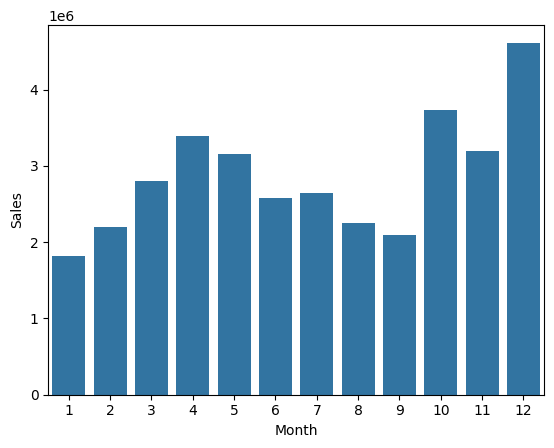

4613443.34

In [5]:
df['Month'] = df['Order Date'].dt.month
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df_monthly_sales = df.groupby('Month')['Sales'].sum()
sns.barplot(df_monthly_sales)
plt.show()
max(df_monthly_sales)

### Question 2: What city sold the most product?

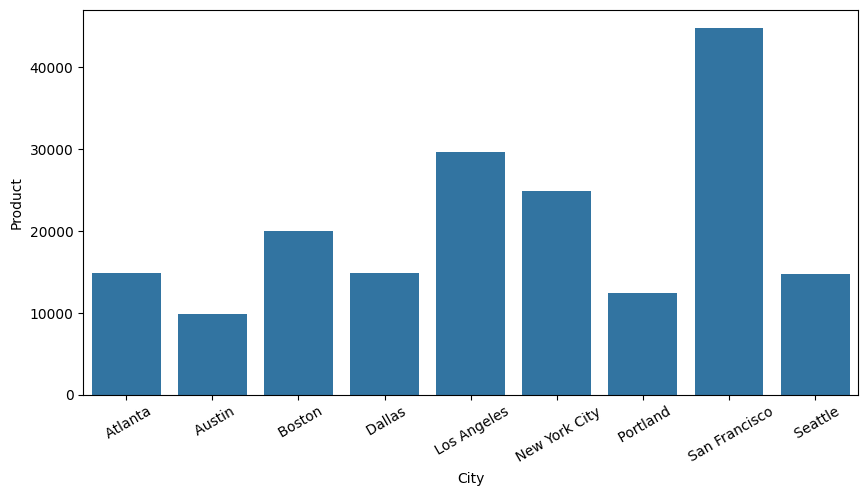

In [6]:
# First, we have to extract city from the address and make new column named 'City'
df['City'] = df['Purchase Address'].str.split(',').str[1]
plt.figure(figsize=(10,5))
plt.xticks(rotation=30)
sns.barplot(df.groupby('City')['Product'].count())
plt.show()

### Question 3: What time of the day should we display advertisements to maximize likelihood of customer's buying product?

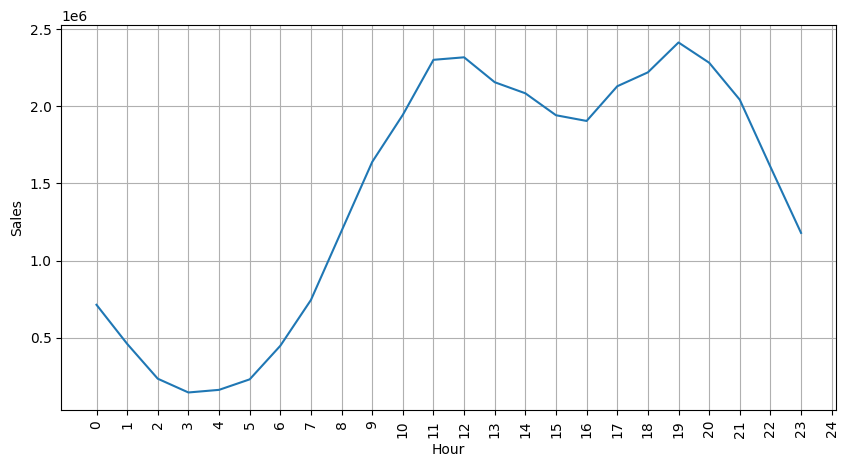

In [7]:
# We have to add a new column for Hour at which shopping is done
import numpy as np
df['Hour'] = df['Order Date'].dt.hour
plt.figure(figsize=(10,5))
plt.xticks(np.arange(0, 25), rotation =90)
sns.lineplot(df.groupby('Hour')['Sales'].sum())
plt.grid()
plt.show()


Ans: Best time to run ad is 12pm-1pm and 5pm-8pm.

### Question 4: What products are most often sold together?

<ipython-input-8-b07f7441c384>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_multi_product['Grouped'] = df_multi_product.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


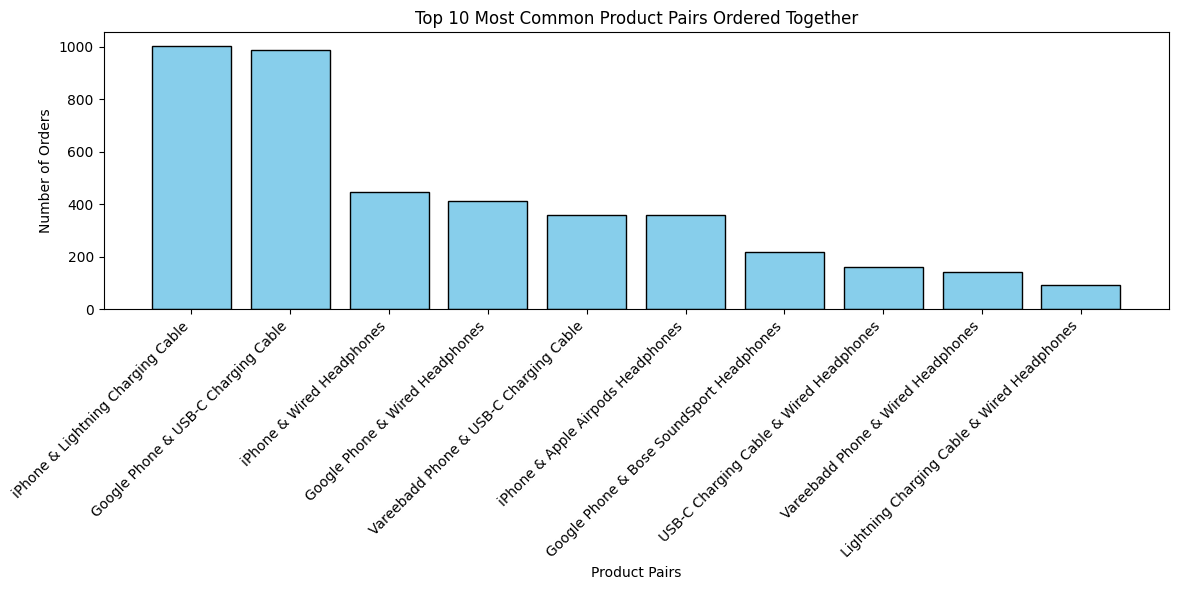

In [8]:

# Step 1
df_multi_product = df[df['Order ID'].duplicated(keep=False)]

# Step 2: Group by 'Order ID' and aggregate the 'Product' column to get all products in the same order
df_multi_product['Grouped'] = df_multi_product.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop duplicates to get a unique list of product combinations per 'Order ID'
df_multi_product = df_multi_product[['Order ID', 'Grouped']].drop_duplicates()

# Step 3: Count the frequency of each combination of products
from itertools import combinations
from collections import Counter

count = Counter()

# Iterate through the 'Grouped' column to count combinations
for products in df_multi_product['Grouped']:
    product_list = products.split(',')
    # Get all possible 2-product combinations in each order
    count.update(Counter(combinations(product_list, 2)))

# Display the most common product combinations
most_common_combinations = count.most_common(10)
print(most_common_combinations)

# Separate the data into two lists: product pairs and their corresponding frequencies
product_pairs = [f"{pair[0]} & {pair[1]}" for pair, freq in most_common_combinations]
frequencies = [freq for pair, freq in most_common_combinations]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(product_pairs, frequencies, color='skyblue', edgecolor='black')
plt.title('Top 10 Most Common Product Pairs Ordered Together')
plt.xlabel('Product Pairs')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
plt.tight_layout()
plt.show()

### What Product is sold the most?

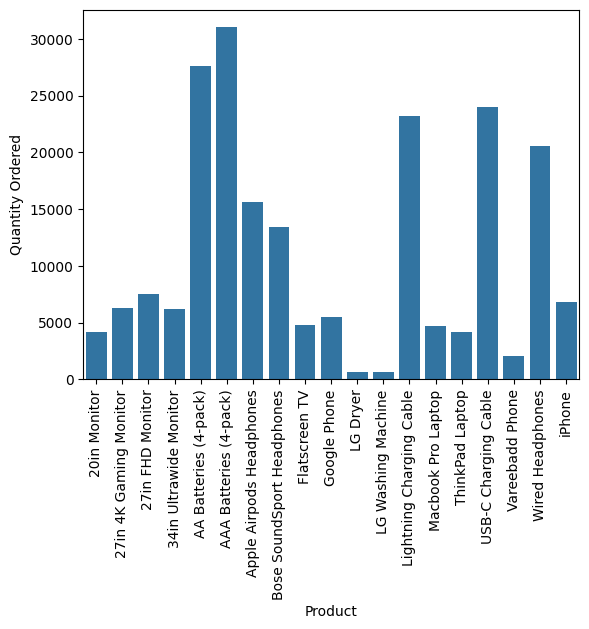

In [9]:
barplot = sns.barplot(df.groupby('Product')['Quantity Ordered'].sum())
plt.xticks(rotation=90)
plt.show()

Ans: AAA Batteries are sold most